In [1]:
import os
import sys
import pandas as pd
import numpy as np
import tsfresh
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sys.path.append('..')

import datasets

In [97]:
train, test = datasets.load_data('../data/yearly_24')
train.shape, test.shape

((212015, 24), (23000, 24))

In [98]:
def wide_to_long(arr):
    return pd.DataFrame({'ind': [i for series_id in range(arr.shape[0]) for i in [series_id] * arr.shape[1]],
                         'time': list(range(arr.shape[1])) * arr.shape[0],
                         'values': arr.flatten()})

In [99]:
fresh_df_train = wide_to_long(train)
fresh_df_test = wide_to_long(test)

fresh_df_train.shape, fresh_df_test.shape

((5088360, 3), (552000, 3))

In [100]:
features_train = tsfresh.extract_features(fresh_df_train, column_id='ind', column_sort='time')
features_test = tsfresh.extract_features(fresh_df_test, column_id='ind', column_sort='time')

Feature Extraction: 100%|██████████| 120/120 [01:13<00:00,  1.63it/s]


In [101]:
list(features_train.columns)

['values__variance_larger_than_standard_deviation',
 'values__has_duplicate_max',
 'values__has_duplicate_min',
 'values__has_duplicate',
 'values__sum_values',
 'values__abs_energy',
 'values__mean_abs_change',
 'values__mean_change',
 'values__mean_second_derivative_central',
 'values__median',
 'values__mean',
 'values__length',
 'values__standard_deviation',
 'values__variation_coefficient',
 'values__variance',
 'values__skewness',
 'values__kurtosis',
 'values__absolute_sum_of_changes',
 'values__longest_strike_below_mean',
 'values__longest_strike_above_mean',
 'values__count_above_mean',
 'values__count_below_mean',
 'values__last_location_of_maximum',
 'values__first_location_of_maximum',
 'values__last_location_of_minimum',
 'values__first_location_of_minimum',
 'values__percentage_of_reoccurring_values_to_all_values',
 'values__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'values__sum_of_reoccurring_values',
 'values__sum_of_reoccurring_data_points',
 'values__r

In [102]:
list(features_train.loc[:, features_train.isna().any()].columns)

['values__variation_coefficient',
 'values__sample_entropy',
 'values__benford_correlation',
 'values__autocorrelation__lag_0',
 'values__autocorrelation__lag_1',
 'values__autocorrelation__lag_2',
 'values__autocorrelation__lag_3',
 'values__autocorrelation__lag_4',
 'values__autocorrelation__lag_5',
 'values__autocorrelation__lag_6',
 'values__autocorrelation__lag_7',
 'values__autocorrelation__lag_8',
 'values__autocorrelation__lag_9',
 'values__partial_autocorrelation__lag_1',
 'values__partial_autocorrelation__lag_2',
 'values__partial_autocorrelation__lag_3',
 'values__partial_autocorrelation__lag_4',
 'values__partial_autocorrelation__lag_5',
 'values__partial_autocorrelation__lag_6',
 'values__partial_autocorrelation__lag_7',
 'values__partial_autocorrelation__lag_8',
 'values__partial_autocorrelation__lag_9',
 'values__index_mass_quantile__q_0.1',
 'values__index_mass_quantile__q_0.2',
 'values__index_mass_quantile__q_0.3',
 'values__index_mass_quantile__q_0.4',
 'values__inde

In [46]:
na_cols = features_train.isna().any()
features_train = features_train.loc[:, ~na_cols]
features_test = features_test.loc[:, ~na_cols]
features_train.shape, features_test.shape

((17962, 399), (5000, 399))

In [56]:
pca = PCA(n_components=2)

sc = StandardScaler()
mm = MinMaxScaler()

feats_2d_train = sc.fit_transform(features_train.values)
feats_2d_test = sc.fit_transform(features_test.values)

feats_2d_train = pca.fit_transform(feats_2d_train)
feats_2d_test = pca.transform(feats_2d_test)

feats_2d_train.shape, feats_2d_test.shape

((17962, 2), (5000, 2))

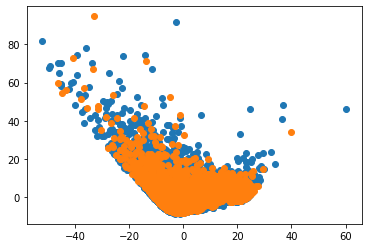

In [57]:
plt.scatter(feats_2d_train[:, 0], feats_2d_train[:, 1])
plt.scatter(feats_2d_test[:, 0], feats_2d_test[:, 1])